In [1]:
print("Hello, world")

Hello, world


In [2]:
import os
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pandas as pd
import numpy as np
import codecs
import argparse

parser = argparse.ArgumentParser(description='Plotting data.')
parser.add_argument('--dataset', type=str, help='dataset', default='test_merged.csv')
parser.add_argument('--inpath', type=str, help='where the dataset is lcoated', default='../../../resources/test/results_IS/')
parser.add_argument('--outpath', type=str, help='where to put the charts', default='../../../resources/test/results_IS/')
args, unknown = parser.parse_known_args()

# ==============================================================================
# Chart variables
# ==============================================================================
titlesize = 16
subtitlesize = 14
labelsize = 14
axessize = 12
legendsize = 11
markersize = 5

# http://scipy-cookbook.readthedocs.io/items/Matplotlib_LaTeX_Examples.html
plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('grayscale')
# plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
font = font_manager.FontProperties(family='serif', size=legendsize)

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare
# exception because of the number of lines being plotted on it.
# Common sizes: (10, 7.5) and (12, 9)
# Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)
figsize = (12, 9)
# figsize = (12,3)

# Markers - https://matplotlib.org/api/markers_api.html
markers = ["v", "^", "<", ">", "8", "s", "p", "P", "*", "+", "X", "D", "o", "s"]
greyscale = ['silver', 'grey', 'lightgrey', 'black']

# Lines - https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

# =============================================================================
# Location String	Location Code
# 'best'	0
# 'upper right'	1
# 'upper left'	2
# 'lower left'	3
# 'lower right'	4
# 'right'	5
# 'center left'	6
# 'center right'	7
# 'lower center'	8
# 'upper center'	9
# 'center'	10
# =============================================================================

# =============================================================================
# These are the "Tableau 20" colors as RGB.
# http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
# =============================================================================
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

# ==============================================================================
path = args.inpath
outpath = args.outpath
filename = args.dataset
simMember, simMeta, synMember, synMeta, nsize, covThr, maxNgramDistance = 0.8, 0.4, 1, 6, 3, 0.7, 3
datasets = ["Foodmart", "SSB"]  # ["dataset_patrick", "dataset_patrick_ssb"]
data = pd.DataFrame()
with codecs.open(path + filename, 'r', encoding='utf-8') as f:
    data = pd.read_csv(f, sep=';')
    # data.infer_objects()
data["dataset"] = data["dataset"].apply(lambda x: "SSB" if "ssb" in x else "Foodmart")
data["synMeta"] = data["synMeta"] + 1
# msize, m, ls, l, c = marker(filename)
col_width=0.15
figsize11 = (4, 3)

In [6]:
%matplotlib inline
def marker(filename):
    # if 'EXT' in filename:
    return 6, 'o', '-', 'C-BI', 'black'

def myticks(x):
    if x == 0 or int(np.log10(x)) == 0: return str(x)
    exponent = int(np.log10(x))
    coeff = float(x) / 10.0 ** exponent
    return r"${:2.1f} \cdot 10^{{{:2d}}}$".format(coeff, exponent)

def common_chart_settings(ax, fig, title):
    ax.grid(color="lightgray", linestyle='-', linewidth=0.2)
    ax.set_axisbelow(True)
    ax.set_title(title)
    
    # ax.legend(handletextpad=0, columnspacing=0.4, labelspacing=0.2, frameon=False, fontsize=legendsize, ncol=4, bbox_to_anchor=(0.5, 1.1), loc='upper center')
    # fig.tight_layout()
    
    handles, labels = ax.get_legend_handles_labels()
    if (len(labels) > 0):
        fig.legend(handles, labels, loc='lower left', ncol=4, mode="expand", bbox_to_anchor=(0, -0.02, 1, 0.2), columnspacing=0.2, labelspacing=0.2, frameon=True, fontsize=9) # , fontsize=legendsize)
    fig.tight_layout(rect=(0,0.04,1,1))

    fig.show()

def my_filter(ddata, dataset, 
              apply_sim_meta=False, apply_syn_meta=False, apply_kb=False, 
              apply_ngram_count=False, apply_disambiguation=-1, apply_k=1, apply_run=0):
    ddata = ddata[ddata["search"] == "bktree"]
    ddata = ddata[ddata["synMember"] == synMember]
    ddata = ddata[ddata["%missing"] == covThr]
    ddata = ddata[ddata["maxDistance"] == maxNgramDistance]
    ddata = ddata[ddata["simMember"] == simMember]
    ddata = ddata[ddata["ngramSize"] == nsize]
    ddata = ddata[ddata["dataset"] == dataset]

    ddata = ddata[ddata["k"] <= apply_k]
    ddata = ddata[ddata["run"] <= apply_run]
    
    if apply_sim_meta:
        if dataset == "Foodmart":
            ddata = ddata[ddata["simMeta"] == simMeta]
        else:
            ddata = ddata[ddata["simMeta"] == 0.7]
    
    if apply_syn_meta:
        ddata = ddata[ddata["synMeta"] == synMeta]
    
    if apply_disambiguation > 0:
        ddata = ddata[ddata["disambiguationStep"] == apply_disambiguation]
    
    if apply_ngram_count:
        # ddata = ddata[ddata["ngrams_count"] % 2 == 1]
        ddata = ddata[ddata["ngrams_count"] % 2 == 0]
        ddata = ddata[ddata["ngrams_count"] > 0]
    
    if apply_kb:
        ddata = ddata[ddata["kbsize"] == ddata["kbsize"].max()]
    
    return ddata
    
def plot_kb(ddata, dataset):
    # ########################################################################
    # Plot accuracy for increasing kbsize
    fig, ax = plt.subplots(1, 1, figsize=figsize11)
    ddata = my_filter(data, dataset, apply_sim_meta=True, apply_syn_meta=True, apply_disambiguation=3)
    res = []
    ss = sorted([x for x in ddata["kbsize"].unique()])
    for s in ss:
        dddata = ddata
        dddata = dddata[dddata["kbsize"] == s]
        d = dddata.groupby(["id"])
        res.append([s, d['similarity'].max().mean()])
    ind = np.arange(len(res))  # the x locations for the groups
    ax.bar(ind, [x[1] for x in res], width=col_width, color='grey', bottom=0)
    ax.set_xticks(ind)
    ax.set_xticklabels([myticks(x[0]) for x in res]) 
    ax.set_ylabel("$TSim$", fontsize=axessize)
    ax.set_xlabel("$|KB|$", fontsize=axessize)
    ax.set_ylim([0, 1])
    common_chart_settings(ax, fig, dataset)
    fig.savefig('{}kbsize_{}.pdf'.format(outpath, dataset))

def plot_pruning(ddata, dataset):
    # ########################################################################
    # ### Efficiency - pruning
    fig, ax = plt.subplots(1, 1, figsize=figsize11)
    ddata = my_filter(data, dataset, 
                      apply_kb=True, apply_disambiguation=0, apply_k=10, apply_ngram_count=True)
    d = ddata.groupby(["ngrams_count"])
    k = list(d.groups.keys())
    ax.set_ylabel("Explored mappings", fontsize=axessize)
    ind = np.arange(len(k))  # the x locations for the groups
    ax.bar(ind, d['sentence_pruned'].mean(), width=col_width, color='black', bottom=0, label="Computed")
    ax.bar(ind + col_width, d['sentence_count_pruned'].mean(), width=col_width, color='grey', bottom=0, label="Distinct")
    ax.bar(ind + col_width * 2, d['sentence_count'].mean(), width=col_width, color='darkgrey', bottom=0, label="All")
    print(dataset)
    print(d['sentence_pruned'].mean())
    print(d['sentence_count_pruned'].mean())
    print(d['sentence_count'].mean())
    ax.set_xticks(ind + col_width)
    ax.set_xticklabels(k)
    ax.set_xlabel("$|M|$", fontsize=axessize)
    ax.set_yscale('log')
    common_chart_settings(ax, fig, dataset)
    fig.savefig('{}pruning_{}.pdf'.format(outpath, dataset))
    # plt.clf()

def plot_disambiguation(ddata, dataset):
    # ########################################################################
    # Plot accuracy for increasing disambiguation step
    fig, ax = plt.subplots(1, 1, figsize=figsize11)
    ddata = my_filter(data, dataset, apply_sim_meta=True, apply_syn_meta=True, apply_kb=True)
    res = []
    for s in sorted([x for x in ddata["disambiguationStep"].unique()]):
        dddata = ddata
        dddata = dddata[dddata["disambiguationStep"] == s]
        d = dddata.groupby(["id"])
        res.append([s, d['similarity'].max().mean()])
    ind = np.arange(len(res))  # the x locations for the groups
    ax.bar(ind, [x[1] for x in res], width=col_width, color='grey', bottom=0)
    ax.set_xticks(ind)
    ax.set_xticklabels([x[0] for x in res])
    ax.set_ylabel("$TSim$", fontsize=axessize)
    print("{} disambiguation accuracy: {}".format(dataset, str(res)))
    ax.set_xlabel("Disambiguation step", fontsize=axessize)
    ax.set_ylim([0, 1])
    common_chart_settings(ax, fig, dataset)
    fig.savefig('{}disambiguation_{}.pdf'.format(outpath, dataset))
    # plt.clf()

# Effectiveness - top-k similarity (no disambiguation)
def plot_eff(ddata, fixed_n, dataset):
    fig, ax = plt.subplots(1, 1, figsize=figsize11)
    ddata = ddata = my_filter(data, dataset, apply_sim_meta=not fixed_n, apply_syn_meta=fixed_n, 
                              apply_disambiguation=0, apply_k=10, apply_kb=True, apply_ngram_count=True)
    ks = sorted([x for x in ddata["k"].unique()])
    res = []
    width = 0  # the width of the bars
    incwidth = 0.15
    ind = 0
    ss = sorted([x for x in ddata["simMeta" if fixed_n else "synMeta"].unique()])
    # ss = sorted([x for x in ddata["distanceThr" if fixed_n else "synMeta"].unique()])
    for idx, s in enumerate(ss, start=0):
        res = []
        for k in ks:
            dddata = ddata
            dddata = dddata[dddata["simMeta" if fixed_n else "synMeta"] == s]
            # dddata = dddata[dddata["distanceThr" if fixed_n else "synMeta"] == s]
            dddata = dddata[dddata["k"] <= k]
            d = dddata.groupby(["id"])
            res.append([k, d['similarity'].max().mean()])
        c = greyscale[idx]
        ind = np.array([0]) if len(res) == 0 else np.arange(len(res))  # the x locations for the groups
        ax.bar(ind + width, [x[1] for x in res], width=incwidth, color=c, bottom=0, label="${}={}$".format("\\alpha" if fixed_n else "N", str(s)))
        width = width + incwidth
        print("{} {}{} sim {}".format(dataset, ("\\alpha" if fixed_n else "N"), str(s), str([x[1] for x in res])))
    ax.set_xticks(ind + incwidth)
    ax.set_xticklabels([x[0] for x in res])
    ax.set_ylabel("$TSim$", fontsize=axessize)
    ax.set_xlabel("$k$", fontsize=axessize)
    ax.set_ylim([0, 1])
    common_chart_settings(ax, fig, dataset)
    fig.savefig('{}{}_{}.pdf'.format(outpath, "alpha" if fixed_n else "N", dataset))
    # fig.show()
    # plt.clf()
        
# ########################################################################
# Efficiency - Time (s)
def plot_time(ddata, fixed_n, dataset):
    fig, ax = plt.subplots(1, 1, figsize=figsize11)
    ddata = my_filter(data, dataset, 
                      apply_sim_meta=not fixed_n, apply_syn_meta=fixed_n, 
                      apply_kb=True, apply_disambiguation=0, apply_k=10, apply_run=10, apply_ngram_count=True)
    width = 0  # the width of the bars
    incwidth = 0.15
    ss = sorted([x for x in ddata["simMeta" if fixed_n else "synMeta"].unique()])
    # ss = sorted([x for x in ddata["distanceThr" if fixed_n else "synMeta"].unique()])
    allks = set()
    for idx, s in enumerate(ss, start=0):
        dddata = ddata
        dddata = dddata[dddata["simMeta" if fixed_n else "synMeta"] == s]
        # dddata = dddata[dddata["distanceThr" if fixed_n else "synMeta"] == s]
        d = dddata.groupby(["ngrams_count"])
        k = list(d.groups.keys())
        print("{} {} {}".format(dataset, s, str(k)))
        allks |= set(k)
        c = greyscale[idx]
        ind = np.arange(len(k))  # the x locations for the groups
        ax.bar(ind + width, d['total_time'].mean() / 1000, width=incwidth, bottom=0, color=c, label="${}={}$".format("\\alpha" if fixed_n else "N", str(s)))  # ",
        width = width + incwidth
    ax.set_xticks(np.arange(len(allks)) + incwidth)
    ax.set_xticklabels(sorted(list(allks)))
    ax.set_ylabel("$Time~(s)$", fontsize=axessize)
    ax.set_xlabel("$|M|$", fontsize=axessize)
    ax.set_yscale('log')
    ax.set_ylim([0.05, 10])  # for DOLAP ymax = 100
    common_chart_settings(ax, fig, dataset)
    fig.savefig('{}{}_time_{}.pdf'.format(outpath, "alpha" if fixed_n else "N", dataset))
    # plt.clf()

<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Foodmart
ngrams_count
2     16.119048
4     39.904282
6    393.904832
8    149.810030
Name: sentence_pruned, dtype: float64
ngrams_count
2      16.896825
4      70.023929
6    1183.572474
8    1716.407295
Name: sentence_count_pruned, dtype: float64
ngrams_count
2      26.513228
4     153.528967
6    4987.387994
8    6964.937690
Name: sentence_count, dtype: float64


<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


SSB
ngrams_count
2      9.929878
4     16.147643
6     48.138462
8    107.889980
Name: sentence_pruned, dtype: float64
ngrams_count
2      9.960366
4     25.048387
6    130.894675
8    641.367387
Name: sentence_count_pruned, dtype: float64
ngrams_count
2      17.573171
4      56.973945
6     420.328994
8    3194.897839
Name: sentence_count, dtype: float64


<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Foodmart disambiguation accuracy: [[0, 0.8857272727272728], [1, 0.912], [2, 0.9159090909090909], [3, 0.917]]


<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


SSB disambiguation accuracy: [[0, 0.8938181818181818], [1, 0.9362385321100919], [2, 0.9418348623853211], [3, 0.9429357798165138]]


<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


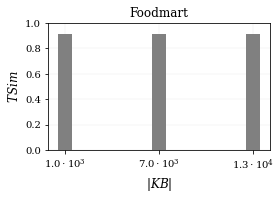

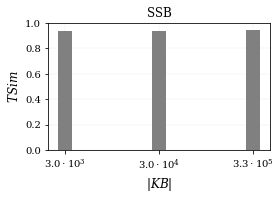

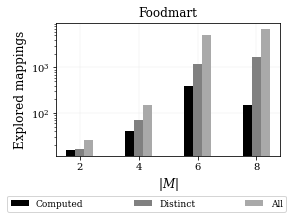

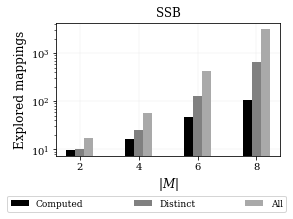

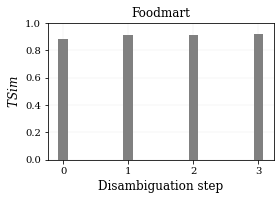

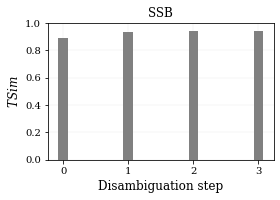

In [8]:
for dataset in datasets:
    plot_kb(data, dataset)
for dataset in datasets:
    plot_pruning(data, dataset)
for dataset in datasets:
    plot_disambiguation(data, dataset)

Foodmart \alpha0.4 sim [0.9726760563380282, 0.9618181818181818, 0.9618181818181818, 0.9641414141414142, 0.9585436893203884]
Foodmart \alpha0.5 sim [0.9527848101265822, 0.9448958333333334, 0.9499019607843138, 0.9562745098039215, 0.949903846153846]
Foodmart \alpha0.6 sim [0.9498734177215189, 0.9326262626262626, 0.9400961538461539, 0.9455769230769231, 0.9455769230769231]
Foodmart \alpha0.7 sim [0.9348051948051946, 0.9149484536082474, 0.9187254901960784, 0.9232352941176469, 0.9232352941176469]


<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


SSB \alpha0.4 sim [0.9685526315789473, 0.961, 0.9622549019607842, 0.9581553398058252, 0.953047619047619]
SSB \alpha0.5 sim [0.9685526315789473, 0.961, 0.9501904761904763, 0.9501904761904763, 0.9539999999999998]
SSB \alpha0.6 sim [0.9625, 0.960204081632653, 0.9514563106796117, 0.9514563106796117, 0.9553398058252428]
SSB \alpha0.7 sim [0.9625, 0.960204081632653, 0.9514563106796117, 0.9514563106796117, 0.9553398058252428]


<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Foodmart N2 sim [0.9573076923076925, 0.9348543689320388, 0.9501923076923077, 0.9531730769230768, 0.9492380952380952]
Foodmart N4 sim [0.9726315789473683, 0.9517708333333333, 0.9625252525252525, 0.9587254901960784, 0.9570192307692308]
Foodmart N6 sim [0.9726760563380282, 0.9618181818181818, 0.9618181818181818, 0.9641414141414142, 0.9585436893203884]


<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


SSB N2 sim [0.9681333333333333, 0.9591919191919193, 0.9556862745098039, 0.9556862745098039, 0.9563725490196078]
SSB N4 sim [0.9625, 0.960204081632653, 0.9514563106796117, 0.9514563106796117, 0.9553398058252428]
SSB N6 sim [0.9625, 0.960204081632653, 0.9514563106796117, 0.9514563106796117, 0.9553398058252428]


<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Foodmart 0.4 [2, 4, 6, 8]
Foodmart 0.5 [2, 4, 6, 8]
Foodmart 0.6 [2, 4, 6, 8]
Foodmart 0.7 [2, 4, 6, 8]


<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


SSB 0.4 [2, 4, 6, 8]
SSB 0.5 [2, 4, 6, 8]
SSB 0.6 [2, 4, 6, 8]
SSB 0.7 [2, 4, 6, 8]


<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Foodmart 2 [2, 4, 6, 8]
Foodmart 4 [2, 4, 6, 8]
Foodmart 6 [2, 4, 6, 8]


<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


SSB 2 [2, 4, 6, 8]
SSB 4 [2, 4, 6, 8]
SSB 6 [2, 4, 6, 8]


<ipython-input-6-d2925e96a151>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


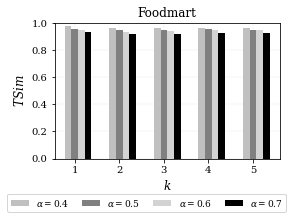

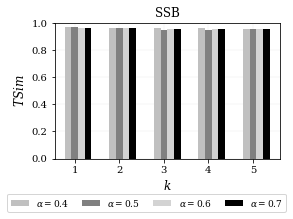

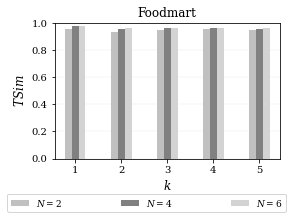

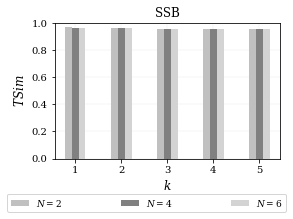

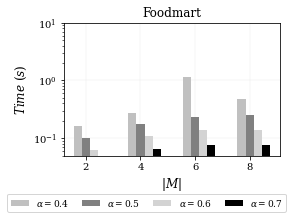

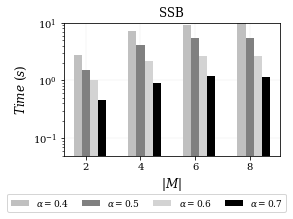

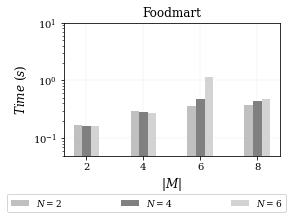

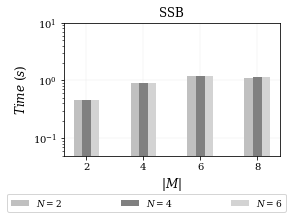

In [7]:
for dataset in datasets:
    plot_eff(data, True, dataset)
for dataset in datasets:
    plot_eff(data, False, dataset)
for dataset in datasets:
    plot_time(data, True, dataset)
for dataset in datasets:
    plot_time(data, False, dataset)